<a href="https://colab.research.google.com/github/Maplemx/Agently/blob/main/docs/guidebook/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **_<font color = "red">Agent</font><font color = "blue">ly</font>_ 3.0 Guidebook**

> How to use: `pip install Agently`
>
> Github Repo: https://github.com/Maplemx/Agently
>
> Contact Me: moxin@Agently.cn
>
> If you like this project, please ⭐️ our repo, thanks.

## Installation & Preparation

Install Agently Python Package:

In [ ]:
!pip install Agently

Install Requiment Packages:

In [ ]:
# Network
!pip install aiohttp
!pip install websockets
!pip install tornado
# Model Clients
!pip install openai
!pip install httpx
!pip install erniebot
!pip install zhipuai
# Data Format
!pip install PyYAML
# Search
!pip install duckduckgo_search

Then we are ready to go!

## What is **_<font color = "red">Agent</font><font color = "blue">ly</font>_** ?

Agently is a development framework that helps developers build AI agent native application really fast.

You can use and build AI agent in your code in an extremely simple way.

You can create an AI agent instance then interact with it like calling a function in very few codes like this below.

Click the run button below and witness the magic. It's just that simple:

In [ ]:
# Import and Init Settings
import Agently
agent = Agently.create_agent()
agent\
    .set_settings("use_model", "OpenAI")\
    .set_settings("model.OpenAI.auth", { "api_key": "" })

# Interact with the agent instance like calling a function
result = agent\
    .input("Give me 3 words")\
    .output([("String", "one word")])\
    .start()
print(result)

['apple', 'banana', 'carrot']




And you may notice that when we print the value of `result`, the value is a `list` just like the format of parameter we put into the `.output()`.

In Agently framework we've done a lot of work like this to make it easier for application developers to integrate Agent instances into their business code. This will allow application developers to focus on how to build their business logic instead of figure out how to cater to language models or how to keep models satisfied.



## Easy to Use: Develop AI Agent Native Application Module in an Incredible Easy Way

### What is AI Agent Native Application?

When we start using AI agent in code to help us handle business logic, we can easily sence that there must be some differences from the traditional software develop way. But what're the differences exactly?

I think the key point is to use an AI agent to solve the problem instead of man-made code logic.

In AI agent native application, we put an AI agent instance into our code, then we ask it to execute / to solve the problem with natural language or natural-language-like expressions.

"Ask-Get Response" takes place of traditional "Define Problem - Programme - Code to Make It Happen".

Can that be true and as easy as we say?

Sure! Agently framework provide the easy way to interact with AI agent instance will make application module development quick and easy.

Here down below are two CLI application demos that in two totally different domains but both be built by 64 lines of codes powered by Agently.

### DEMO 1: SQL Generator

In [ ]:
import Agently
agent_factory = Agently.AgentFactory(is_debug = False)

agent_factory\
    .set_settings("current_model", "OpenAI")\
    .set_settings("model.OpenAI.auth", { "api_key": "" })

agent = agent_factory.create_agent()

meta_data = {
    "table_meta" : [
        {
            "table_name": "user",
            "columns": [
                { "column_name": "user_id", "desc": "identity of user", "value type": "Number" },
                { "column_name": "gender", "desc": "gender of user", "value type": ["male", "female"] },
                { "column_name": "age", "desc": "age of user", "value type": "Number" },
                { "column_name": "customer_level", "desc": "level of customer account", "value type": [1,2,3,4,5] },
            ]
        },
        {
            "table_name": "order",
            "columns": [
                { "column_name": "order_id", "desc": "identity of order", "value type": "Number" },
                { "column_name": "customer_user_id", "desc": "identity of customer, same value as user_id", "value type": "Number" },
                { "column_name": "item_name", "desc": "item name of this order", "value type": "String" },
                { "column_name": "item_number", "desc": "how many items to buy in this order", "value type": "Number" },
                { "column_name": "price", "desc": "how much of each item", "value type": "Number" },
                { "column_name": "date", "desc": "what date did this order happend", "value type": "Date" },
            ]
        },
    ]
}

is_finish = False
while not is_finish:
    question = input("What do you want to know: ")
    show_thinking = None
    while str(show_thinking).lower() not in ("y", "n"):
        show_thinking = input("Do you want to observe the thinking process? [Y/N]: ")
    show_thinking = False if show_thinking.lower == "n" else True
    print("[Generating...]")
    result = agent\
        .input({
            "table_meta": meta_data["table_meta"],
            "question": question
        })\
        .instruct([
            "output SQL to query the database according meta data:{table_meta} that can anwser the question:{question}",
            "output language: English",
        ])\
        .output({
            "thinkings": ["String", "Your problem solving thinking step by step"],
            "SQL": ("String", "final SQL only"),
        })\
        .start()
    if show_thinking:
        thinking_process = "\n".join(result["thinkings"])
        print("[Thinking Process]\n", thinking_process)
    print("[SQL]\n", result["SQL"])
    while str(is_finish).lower() not in ("y", "n"):
        is_finish = input("Do you want to quit？[Y to quit / N to continue]: ")
    is_finish = False if is_finish.lower() == "n" else True

### DEMO 2: Character Creator (and Chat with the Character)

In [ ]:
import Agently

agent_factory = Agently.AgentFactory(is_debug = False)

agent_factory\
    .set_settings("current_model", "OpenAI")\
    .set_settings("model.OpenAI.auth", { "api_key": "" })

writer_agent = agent_factory.create_agent()
roleplay_agent = agent_factory.create_agent()

# Create Character
character_desc = input("Describe the character you want to talk to with a few words: ")
is_accepted = ""
suggestions = ""
last_time_character_setting = {}
while is_accepted.lower() != "y":
    is_accepted = ""
    input_dict = { "character_desc": character_desc }
    if suggestions != "":
        input_dict.update({ "suggestions": suggestions })
        input_dict.update({ "last_time_character_setting": last_time_character_setting })
    setting_result = writer_agent\
        .input(input_dict)\
        .instruct([
            "Design a character based on {input.character_desc}.",
            "if {input.suggestions} exist, rewrite {input.last_time_character_setting} followed {input.suggestions}."
          ])\
        .output({
            "name": ("String",),
            "age": ("Number",),
            "character": ("String", "Descriptions about the role of this character, the actions he/she likes to take, his/her behaviour habbits, etc."),
            "belief": ("String", "Belief or mottos of this character"),
            "background_story": [("String", "one part of background story of this character")],
            "response_examples": [{ "Question": ("String", "question that user may ask this character"), "Response": ("String", "short and quick response that this character will say.") }],
        })\
        .on_delta(lambda data: print(data, end=""))\
        .start()
    while is_accepted.lower() not in ("y", "n"):
        is_accepted = input("Are you satisfied with this character role setting? [Y/N]: ")
    if is_accepted.lower() == "n":
        suggestions = input("Do you have some suggestions about this setting? (leave this empty will redo all the setting): ")
        if suggestions != "":
            last_time_character_settings = setting_result
print("[Start Loading Character Setting to Agent...]")
# Load Character to Agent then Chat with It
for key, value in setting_result.items():
    roleplay_agent.set_role(key, value)
print("[Loading is Done. Let's Start Chatting](input '#exit' to quit)")
roleplay_agent.active_session()
chat_input = ""
while True:
    chat_input = input("YOU: ")
    if chat_input == "#exit":
        break
    print(f"{ setting_result['name'] }: ", end="")
    roleplay_agent\
        .input(chat_input)\
        .instruct("Response {chat_input} follow your {ROLE} settings. Response like in a CHAT not a query or request!")\
        .on_delta(lambda data: print(data, end=""))\
        .start()
    print("")
print("Bye👋~")

## Easy to Enhance and Update: Enhance AI Agent using Plugins instead of Rebuild a Whole New Agent



### Why does **_<font color = "red">Agent</font><font color = "blue">ly</font>_** care plugin-to-enhance so much?

The post about [LLM Powered Autonomous Agents](https://lilianweng.github.io/posts/2023-06-23-agent/) by Lilian Weng from OpenAI has given a really good concept of the basic structure of AI agent. But the post did not give the explanation about how to build an AI agent.

Some awesome projects like [LangChain](https://python.langchain.com/docs/modules/agents/) and [Camel-AI](https://github.com/camel-ai/camel/tree/master/camel/agents) present their ideas about how to build AI agent. In these projects, agents are classified into many different type according the task of the agent or the thinking process of the agent.

But if we follow these ideas to build agents, that means we must build a whole new agent if we want to have a new agent to work in a different domain. Even though all the projects provide a ChatAgent basic class or something like that, still new agent sub-classes will be built and more and more specific types of agent will be produce. With the number of agent types increasing, one day, boom! There'll be too many types of agent for developer to choose and for agent platform to manage. They'll be hard to seach, hard to choose, hard to manage and hard to update.

So Agently team can not stop wondering if there's a better way to enhance agent and make all developers easy to participate in.

Also, AI agent's structure and components seems simple and easy to build at present. But if we look further ahead, each component shall be more complex (memory management for example) and more and more new components will be added in (sencors for example).

What if we stop building agent like an undivded whole but to seperate it into a center structure which is managing the runtime context data and runtime process and connect wiht different plugins to enhance its abilities in the runtime process to make it suitable for different usage scene? "Divide and conquer", just like the famous engineering motto said.

We make it happened in Agently 3.0 and when Agently 3.0 in its alpha test, we were happy to see this plugin-to-enhance design not only solved the problem about rebuild a whole new agent, but also helped each component developers focuing on the target and questions only that component care about without distraction. That makes component plugin develop really easy and code simple.

### Agent Structure that **_<font color = "red">Agent</font><font color = "blue">ly</font>_** Framework Can Help to Build
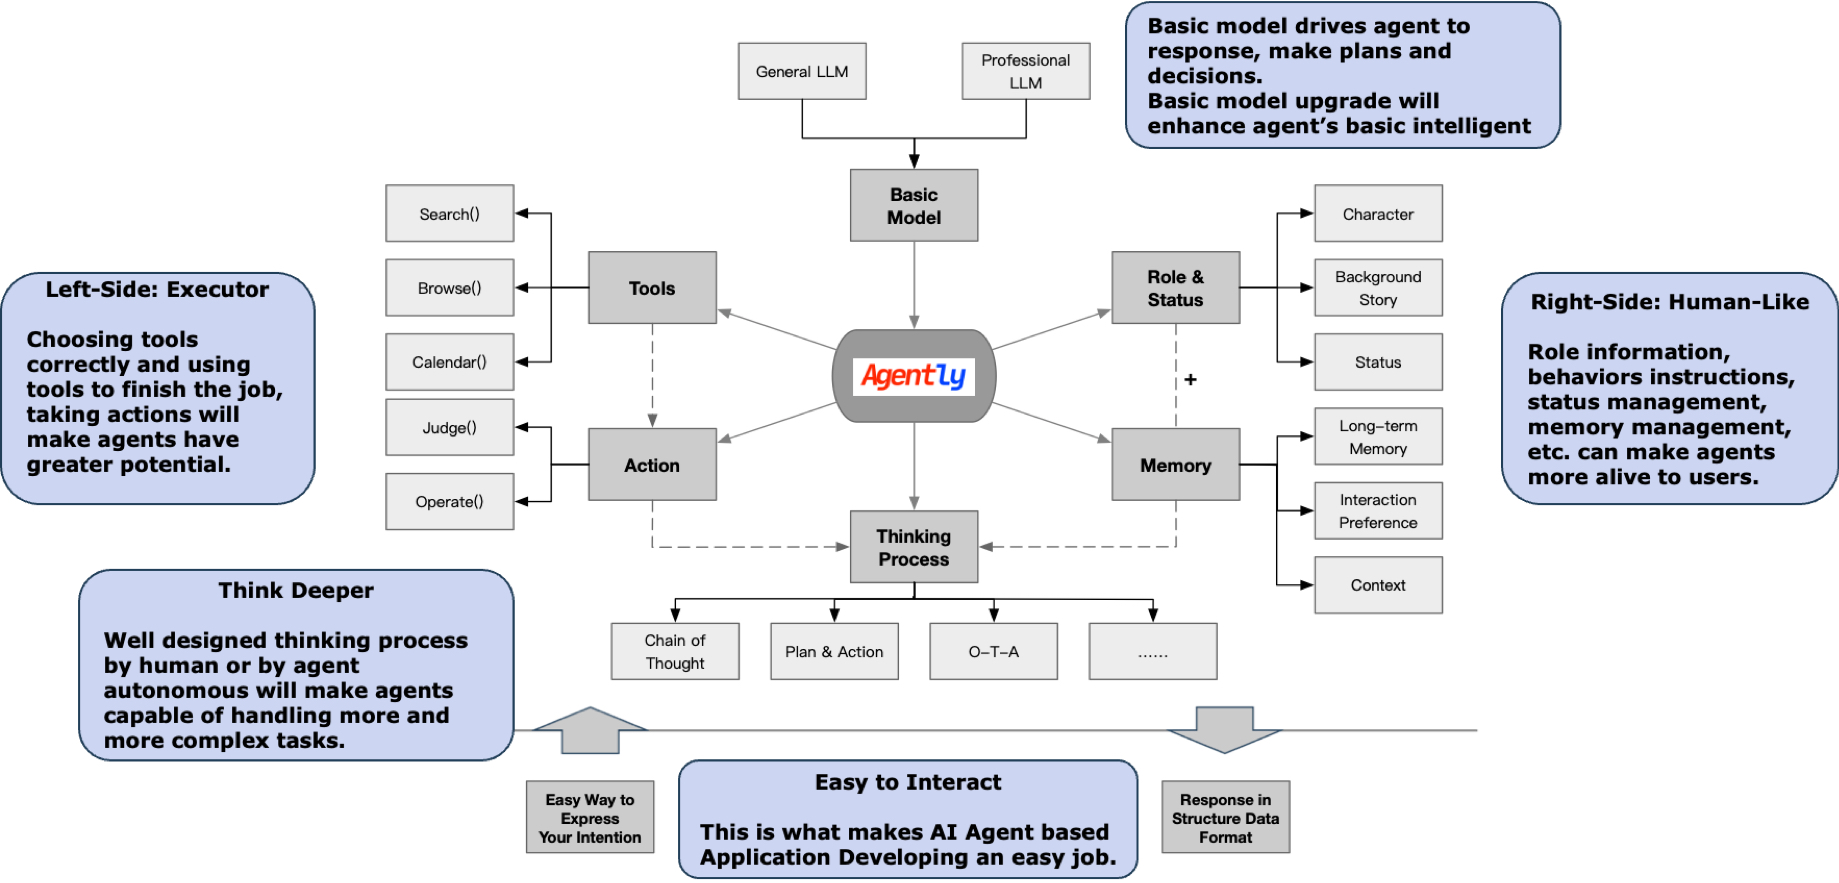

### EXAMPLE 1: Source Code of Agent Component - Role

Here's an example that shows how to develop an agent component plugin in Agently framework. Because of the runtime context data management work has been done by the framework, plugin developers can use many runtime tools to help building the agent component plugin. That makes the work pretty easy.

> ⚠️: The code below is an plugin code example, it works in the framework and can not be run seperately.

In [ ]:
from .utils import ComponentABC
from Agently.utils import RuntimeCtxNamespace

# Create Plugin Class comply with Abstract Basic Class
class Role(ComponentABC):
    def __init__(self, agent: object):
        self.agent = agent
        # Framework pass runtime_ctx and storage through and component can use them
        self.role_runtime_ctx = RuntimeCtxNamespace("role", self.agent.agent_runtime_ctx)
        self.role_storage = self.agent.global_storage.table("role")

    # Defined methods of this component
    # Update runtime_ctx which follow the agent instance lifetime circle
    def set_name(self, name: str, *, target: str):
        self.role_runtime_ctx.set("NAME", name)
        return self.agent

    def set(self, key: any, value: any=None, *, target: str):
        if value is not None:
            self.role_runtime_ctx.set(key, value)
        else:
            self.role_runtime_ctx.set("DESC", key)
        return self.agent

    def update(self, key: any, value: any=None, *, target: str):
        if value is not None:
            self.role_runtime_ctx.update(key, value)
        else:
            self.role_runtime_ctx.update("DESC", key)
        return self.agent

    def append(self, key: any, value: any=None, *, target: str):
        if value is not None:
            self.role_runtime_ctx.append(key, value)
        else:
            self.role_runtime_ctx.append("DESC", key)
        return self.agent

    def extend(self, key: any, value: any=None, *, target: str):
        if value is not None:
            self.role_runtime_ctx.extend(key, value)
        else:
            self.role_runtime_ctx.extend("DESC", key)
        return self.agent

    # Or save to / load from storage which keep the data in file storage or database
    def save(self, role_name: str=None):
        if role_name == None:
            role_name = self.role_runtime_ctx.get("NAME")
        if role_name != None and role_name != "":
            self.role_storage\
                .set(role_name, self.role_runtime_ctx.get())\
                .save()
            return self.agent
        else:
            raise Exception("[Agent Component: Role] Role attr 'NAME' must be stated before save. Use .set_role_name() to specific that.")

    def load(self, role_name: str):
        role_data = self.role_storage.get(role_name)
        for key, value in role_data.items():
            self.role_runtime_ctx.update(key, value)
        return self.agent

    # Pass the data to request standard slots on Prefix Stage
    def _prefix(self):
        return {
            "role": self.role_runtime_ctx.get(),
        }

    # Export component plugin interface to be called in agent runtime process
    def export(self):
        return {
            "early": None, # method to be called on Early Stage
            "prefix": self._prefix, # method to be called on Prefix Stage
            "suffix": None, # mothod to be called on Suffix Stage
            # Alias that application developers can use in agent instance
            # Example:
            # "alias": { "set_role_name": { "func": self.set_name } }
            # => agent.set_role_name("Alice")
            "alias": {
                "set_role_name": { "func": self.set_name },
                "set_role": { "func": self.set },
                "update_role": { "func": self.update },
                "append_role": { "func": self.append },
                "extend_role": { "func": self.extend },
                "save_role": { "func": self.save },
                "load_role": { "func": self.load },
            },
        }

# Export to Plugins Dir Auto Scaner
def export():
    return ("Role", Role)

### EXAMPLE 2: Install Plugins outside the Package

Agently framework also allows plugin developers pack their plugin outside the main package of framework and share their plugin package individually to other developers. Developers those who want to use a specific plugin can just download the plugin package, unpack the files into their working folder, then install the plugin easily.

These codes down below will present how easy this installation can be.

> ⚠️: The code below is an plugin install example, it only works when you unpack an plugin folder in your working folder.

In [ ]:
import Agently
# Import install method from plugin folder
from session_plugin import install
# Then install
install(Agently)
# That's all
# Now your agent can use new abilities enhanced by new plugin

Here's also [a real case](https://github.com/Maplemx/Agently/issues/32) when Agently v3.0.1 had an issue that make Session component unavailable. We use plugin package update can fix the bug without update the whole framework package.

## Want to Dive Deeper?

OK. That's the general introduction about Agently AI agent development framework.

If you want to dive deeper, you can also visit these documents/links:

- [Agently 3.0 Application Development Handbook](https://github.com/Maplemx/Agently/blob/main/docs/guidebook/application_development_handbook.ipynb)
- Agently 3.0 Plugin Development Handbook (Working on it)
- [Agently 3.0 Demostration Playground](https://github.com/Maplemx/Agently/tree/main/playground)

---

Don't forget ⭐️ this repo if you like our work.

Thanks and happy coding!